**Machine Learning Summative Assessment**

This course is assessed through a final project. The overall aim of this project is to examine the students understanding of modern machine learning techniques at the basic theoretical, intuitive as well as practical levels. With regard to practical applications we use Python, as well related libraries such as Numpy, Scikit and TensorFlow.

The project is centred around the MNIST data set of handwritten digits. It consists of grayscale images of hand written digits, as well as the true labels/digits of each image. The data is split in train and test sets. Many problems relate to the classification task of predicting the true labels given the images. Instructions with details on the project will be provided during the course. Here we only outline the various stages of the project:

# Unsupervised learning. [15 points] 

Perform a principle component analysis on the MNIST data set. Produce various plots in the dimensionally reduced space using the principle components.

In [1]:
from sklearn import datasets,svm, pipeline, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_approximation import (RBFSampler, Nystroem)

In [ ]:
mnist_data = datasets.fetch_mldata('MNIST original', data_home = 'datasets/')

In [3]:
mnist_data

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [4]:
print(mnist_data.data.shape)
print(mnist_data.target.shape)

(70000, 784)
(70000,)


**Graphing by the elbow method**

In [5]:
# 100% variance explained
pca = PCA()

In [6]:
# Let's PCA the full dataset for the graph
pca.fit(mnist_data.data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
# Summing explained variance
tot = sum(pca.explained_variance_)
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
cum_var_exp = np.cumsum(var_exp)

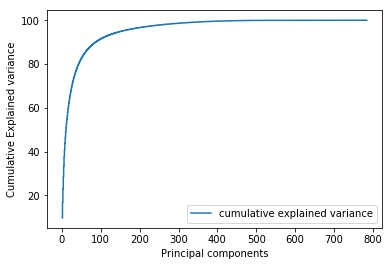

In [8]:
# plotting
%matplotlib inline
plt.step(range(1, 785), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.legend(loc='lower right')
plt.show()

**Define function for explained variances**

In [9]:
def lowdimension(perc):
    pca = PCA(perc)
    temp = pca.fit_transform(mnist_data.data) #lower dimension
    print(perc, 'variance explained', 'is', pca.n_components_, 'out of 784 components')
    new = pca.inverse_transform(temp)
    return new

0.2 variance explained is 3 out of 784 components


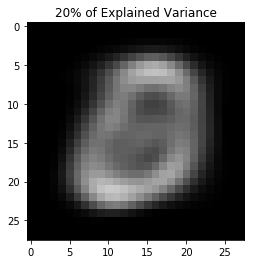

In [10]:
#picking a random digit from this 70k data
plt.imshow(lowdimension(.20)[50453].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.title('20% of Explained Variance');

0.5 variance explained is 11 out of 784 components


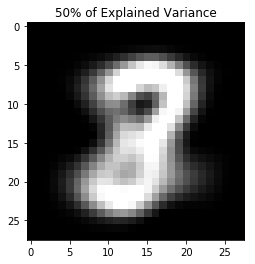

In [107]:
#picking a random digit from this 70k data
plt.imshow(lowdimension(.50)[50453].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.title('50% of Explained Variance');

0.9 variance explained is 87 out of 784 components


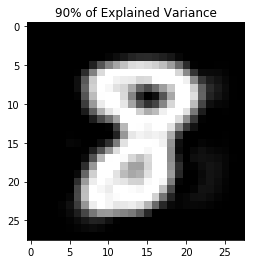

In [103]:
plt.imshow(lowdimension(.90)[50453].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.title('90% of Explained Variance');

0.99 variance explained is 331 out of 784 components


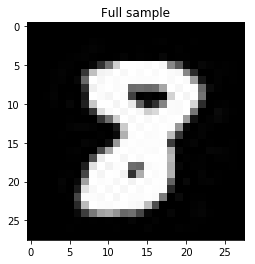

In [104]:
plt.imshow(lowdimension(0.99)[50453].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.title('Full sample');

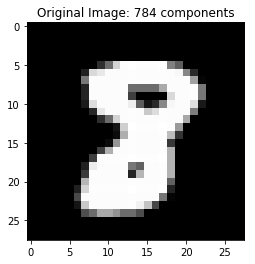

In [105]:
plt.imshow(mnist_data.data[50453].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.title('Original Image: 784 components');

# Support vector machines. [30 points]

a) Theory. [15 points] Explain either the mathematics or the intuition behind the kernel trick used in SVMs and how it allows to express a non-linear classifier through a linear classifier in a higher-dimensional space.

<img src= "dots.png">

<img src= "equation.png">

<img src= "equation2.png" width="400" height="200">

<img src= "3d.png" width="400" height="200">

In [71]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from pylab import *

%pylab

fig = pyplot.figure()
ax = Axes3D(fig)


x_blue = [4,4,5,5.5,6,6]
y_blue = [4,6,4.5,5.5,4,5]
z_blue = [16,24,22.5,30.25,24,30]
x_orange = [0,0,0,0.5,1,1,1.5,2,2,5,6,6]
y_orange = [1,3,5.5,4,2,3.5,6,3,4.5,1,0,1]
z_orange = [0,0,0,2,2,3.5,9,6,9,5,0,6]

# x_div = np.array([2,2,2.1,2.3,2.9,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.1,6.9])
# #x_div = np.arange(0.0, 7, 0.2)
# #y_div = np.array(13.1/x_div)
# y_div = np.array([7,6.5,5.9,5.2,4.5,5.0,3.5,3.0,3.8,2.5,2.1,2.0,2.0,2.0])

# def f(x, y):
#     return x*y

# X, Y = np.meshgrid(x_div, y_div)
# Z = f(X, Y)


# ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, color="gray", alpha = 0.4)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z = x*y')
ax.set_ylim(0, 10)
ax.set_zlim(0, 30)

ax.scatter(x_blue, y_blue, z_blue, color="blue")
ax.scatter(x_orange, y_orange, z_orange, color="orange")

pyplot.show()

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'linalg', 'fft', 'power', 'info']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


b) Practical. [15 points] Build a linear support vector classifier in Python for the MNIST classification task. Use various kernels to build a better non-linear classifier.

In [11]:
#split data to train and test (X=data; y= target)
X_train, X_test, y_train, y_test = train_test_split(mnist_data.data, mnist_data.target, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


**Linear kernel**

In [13]:
clf = svm.SVC(kernel='linear', C = 1.0)

In [14]:
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
expected = y_train
predicted = clf.predict(X_train) #yhat

In [16]:
predicted.shape

(56000,)

In [110]:
print(clf.score(X_test, y_test)) #testing if the model generated from train works at the test set

0.924


In [120]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      5554
        1.0       0.99      1.00      0.99      6296
        2.0       0.98      0.99      0.98      5590
        3.0       0.97      0.97      0.97      5707
        4.0       0.98      0.99      0.99      5496
        5.0       0.98      0.97      0.97      5027
        6.0       1.00      1.00      1.00      5469
        7.0       0.99      0.98      0.98      5817
        8.0       0.98      0.97      0.97      5434
        9.0       0.97      0.97      0.97      5610

avg / total       0.98      0.98      0.98     56000


Confusion matrix:
[[5554    0    0    0    0    0    0    0    0    0]
 [   1 6291    0    0  

**Trying different kernels**
* Polynomial degree 4
* Gaussian Kernel
* Sigmoid Kernel

In [18]:
clf = svm.SVC(kernel='poly', degree=4, C=1.0)

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
expected = y_train
predicted = clf.predict(X_train) #yhat

In [ ]:
print(clf.score(X_test, y_test)) 

In [ ]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

# Neural Networks. [50 points]

a) Theory. [15 points] By applying the chain law of derivatives to the objective function of a neural network, derive the back propagation algorithm.

b) Coding. [20 points] Implement from scratch, as a Python class, a feedforward neural network with 1 hidden layer of 100 hidden units merely using basic linear algebra computations in Numpy. Based on your derivation of back-propagation, or otherwise, implement a train method based on stochastic or batch gradient descent. Test your implementation on the MNIST classification task.

b) Coding. [20 points] Implement from scratch, as a Python class, a feedforward neural network with 1 hidden layer of 100 hidden units merely using basic linear algebra computations in Numpy. Based on your derivation of back-propagation, or otherwise, implement a train method based on stochastic or batch gradient descent. Test your implementation on the MNIST classification task.

# Data Science Challenge. [5 points] 

This is a problem to challenge you. Any reasonable attempt will grant you full points. For this problem (and only for this problem) you are allowed to work in groups of up to 3 students handing in the same solution. The idea is that you use this last problem as a competition between your peers or peer groups in the course. It is a continuation of problem 3.c. Using a high-level frontend for tensorflow such as tflearn or keras, try to improve your classifier by means of deeper networks and/or convolution layers which are readily available as plug&play building blocks. Depending on interest and time we can use the more challenging CIFAR10 data set for this last part as opposed to the simpler to predict MNIST dataset. In the latter case, it would also make sense to use GPUs.

# References

PCA <br>
https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Image_Reconstruction_and_such.ipynb
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

Support Vector Machines

https://www.youtube.com/watch?v=vMmG_7JcfIc <br>
https://www.youtube.com/watch?v=ikt7Qze0czE <br>
https://www.youtube.com/watch?v=8xbnLHn4jjQ <br>
http://www.robots.ox.ac.uk/~az/lectures/ml/lect3.pdf <br>
https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

Backpropagation <br>
https://www.youtube.com/watch?v=XIpyEvLv93A